## EDA inicial
---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [19]:
df = pd.read_csv('../archivos/bikes.csv', index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
df.shape

(730, 16)

In [21]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [23]:
df.describe().T #estadísticos principales de variables numéricas

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [24]:
df.describe(include= 'object').T #cantidad y frecuencia de variables categóricas

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [25]:
df.isnull().sum() #no hay valores nulos

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [26]:
df.duplicated().sum() #no hay filas duplicadas

0

In [39]:
# Renombramos las columnas
nuevas_columnas= ['indice', 'fecha', 'estacion', 'año', 'mes', 'festivo', 'dia_semana', 'laboral', 'clima', 'temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento', 'clientes_casuales', 'clientes_registrados', 'total_bicis']
df.columns = nuevas_columnas

In [33]:
for i,v in enumerate(df['fecha']):
    days= ['1', '2', '3', '4', '5', '6', '7']
    d= datetime.strptime(v, '%d-%m-%Y') #damos la vuelta a la fecha
    df.loc[i,'dia'] = days[d.weekday()] #obtenemos el día de la semana con la fecha y lo añadimos a una nueva columna
    

In [37]:
#Borramos columna dia_semana que tiene la mismainformacion que la columna dia
df.drop('dia_semana', axis=1, inplace=True)

In [52]:
from datetime import date, datetime

Y = 2018 # año bisiesto arbitrario, por si la fecha es un 29 de febrero
estaciones = [('invierno', date(Y,  1,  1),  date(Y,  3, 20)),
              ('primavera', date(Y,  3, 21),  date(Y,  6, 20)),
              ('verano', date(Y,  6, 21),  date(Y,  9, 22)),
              ('otoño', date(Y,  9, 23),  date(Y, 12, 20)),
              ('invierno', date(Y, 12, 21),  date(Y, 12, 31))]

def get_season(fecha):
    for estacion, inicio, fin in estaciones:
      if inicio < fecha and inicio < fin:
        return estacion

In [ ]:
resultado= [get_season(datetime.strptime(fecha,'%d-%m-%Y').date) for fecha in df['fecha']]

In [ ]:
Y=2018
estaciones = [('invierno', date(1,1,Y),  date(20,3,Y)),
              ('primavera', date(21,3,Y),  date(20,6,Y)),
              ('verano', date(21,6,Y),  date(20,9,Y)),
              ('otoño', date(21,9,Y),  date(20,12,Y)),
              ('invierno', date(21,2,Y),  date(31,12,Y))]
def estaciones


In [40]:
df.head(10)

,indice,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
0,1,01-01-2018,spring,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,spring,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,spring,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5
5,6,06-01-2018,spring,0,1,0,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,6
6,7,07-01-2018,spring,0,1,0,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,7
7,8,08-01-2018,spring,0,1,0,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,1
8,9,09-01-2018,spring,0,1,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822,2
9,10,10-01-2018,spring,0,1,0,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,3


In [15]:
df.columns

Index(['indice', 'fecha', 'estación', 'año', 'mes', 'festivo', 'dia_semana',
       'laboral', 'clima', 'temperatura', 'sensacion_termica', 'humedad',
       'velocidad_viento', 'clientes_casuales', 'clientes_registrados',
       'total_bicis'],
      dtype='object')

### COSAS QUE HACER ANTES DEL EDA
 
- Columna estacion: vemos que está mal, hay que sacar la estación através de la fecha.
- El calendario de festivos que encuentran las compañeras tiene 17 festivos, en el dataframe aparecen 21 días festivos.


### TAREAS DENTRO DEL EDA

- Visualizar, analizar y decidir que hacer con los outliers.
- Los 730 registros son de dos años, 2018 y 2019, decidir si queremos hacerlo de los dos o por separado.
- Plantemiento de dividir el dataframe en dos, uno para casual y otra para registered.
- Relación entre las variables predicctoras.
- Relación entre la variable respuesta y las variables predicctoras.



### INFO GENERAL

- Los datos son del Distrito de Columbia, Washington.
- Variable respuesta: total_bicis, número total de alquiler de bicicletas.
- Variables predictoras: todas las de temperaturas, la estación, festivos, aunque pendiente de haber explorado más los datos y de hacer la corr, la cov, heatmap, etc.

---

### EDA (UNA VEZ QUE ESTÉN BIEN LOS DATOS)

In [14]:
# Seleccionamos las variables numéricas
numericas= df.select_dtypes(include= np.number).columns.tolist()
print(numericas)

['indice', 'año', 'mes', 'festivo', 'dia_semana', 'laboral', 'clima', 'temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento', 'clientes_casuales', 'clientes_registrados', 'total_bicis']


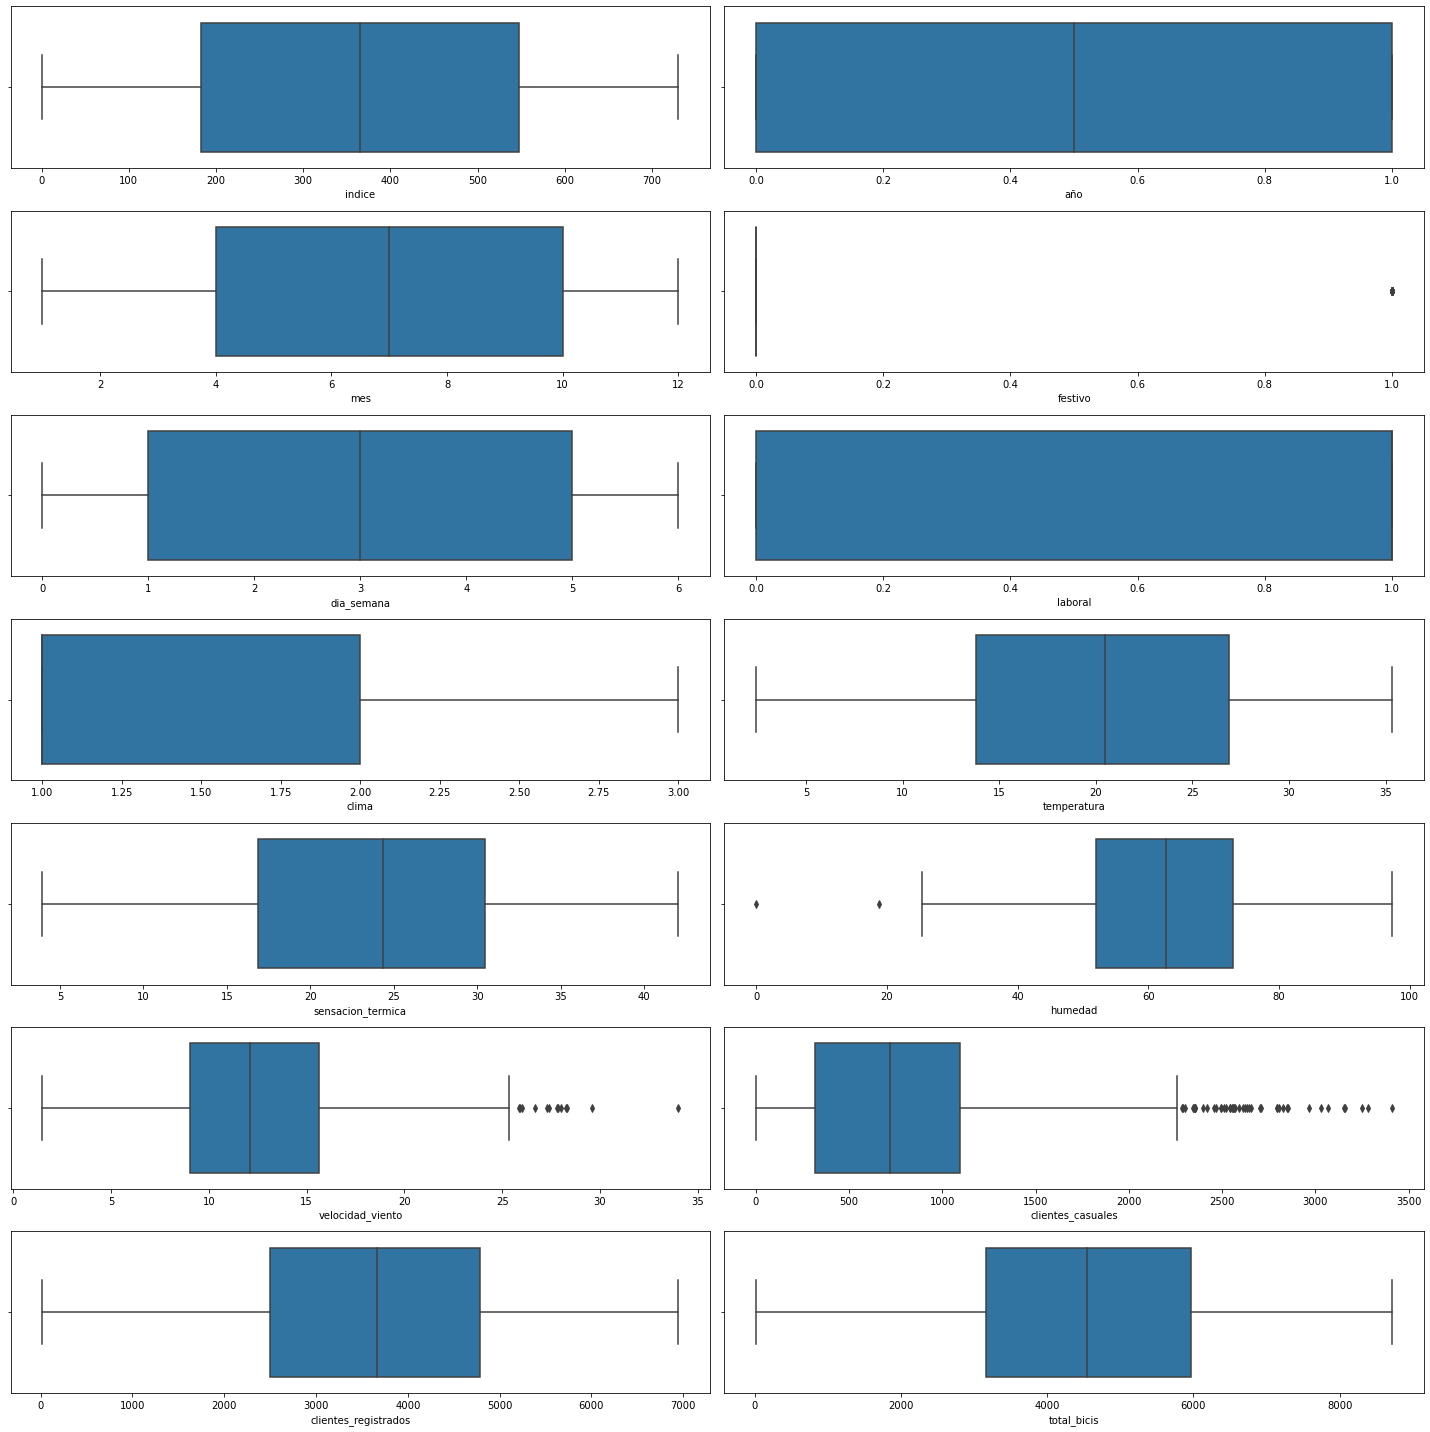

In [15]:
# Gráficas para ver los outliers de cada variable numérica

fig, axes = plt.subplots(7, 2, figsize=(20,20))
axes = axes.flat

for i,col in enumerate(numericas):
  
    sns.boxplot(x= col, data=df, ax=axes[i])
    
fig.tight_layout() 